In [47]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam
import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

In [49]:
train_set = torchvision.datasets.MNIST("./data/", train=True, download=True)
valid_set = torchvision.datasets.MNIST("./data/", train=False, download=True)

In [50]:
x_0, y_0 = train_set[0]

In [51]:
trans = transforms.Compose([transforms.ToTensor()])
x_0_tensor = trans(x_0)

In [52]:
x_0_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [53]:
x_0_tensor.size()

torch.Size([1, 28, 28])

In [54]:
x_0_tensor.to(device).device

device(type='cpu')

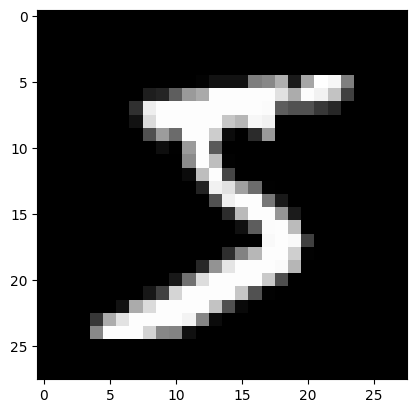

In [55]:
image = F.to_pil_image(x_0_tensor)
plt.imshow(image, cmap='gray')

In [56]:
train_set.transform = trans
valid_set.transform = trans

In [57]:
trans

Compose(    ToTensor())

In [58]:
batch_size = 32

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)

In [59]:
layers = [
    nn.Flatten()
]
layers

[Flatten(start_dim=1, end_dim=-1)]

In [60]:
input_size = 1 * 28 * 28

In [61]:
n_classes = 10

layers = [
    nn.Flatten(),
    nn.Linear(input_size, 512),  # Input
    nn.ReLU(),  # Activation for input
    nn.Linear(512, 512),  # Hidden
    nn.ReLU(),  # Activation for hidden
    nn.Linear(512, n_classes)  # Output
]
layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True)]

In [62]:
model = nn.Sequential(*layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [63]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [64]:
next(model.parameters()).device

device(type='cpu')

In [65]:
loss_function = nn.CrossEntropyLoss()

In [66]:
optimizer = Adam(model.parameters())

In [67]:
train_N = len(train_loader.dataset)
valid_N = len(valid_loader.dataset)

In [68]:
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

In [69]:
def train():
    loss = 0
    accuracy = 0

    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        output = model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [70]:
def validate():
    loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [42]:
epochs = 5

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train()
    validate()

Epoch: 0


Train - Loss: 376.8396 Accuracy: 0.9392
Valid - Loss: 28.7382 Accuracy: 0.9692
Epoch: 1
Train - Loss: 155.7025 Accuracy: 0.9746
Valid - Loss: 29.2779 Accuracy: 0.9704
Epoch: 2
Train - Loss: 110.7679 Accuracy: 0.9815
Valid - Loss: 30.7847 Accuracy: 0.9699
Epoch: 3
Train - Loss: 81.0092 Accuracy: 0.9863
Valid - Loss: 24.3673 Accuracy: 0.9803
Epoch: 4
Train - Loss: 63.6621 Accuracy: 0.9892
Valid - Loss: 25.5780 Accuracy: 0.9784


In [43]:
torch.save(model.state_dict(), 'mnist_model.pth')
print("Model saved to mnist_model.pth")

Model saved to mnist_model.pth


In [44]:
x_0_transformed = trans(x_0).unsqueeze(0).to(device)
prediction = model(x_0_transformed)
prediction

tensor([[-30.8717, -17.9483, -21.2390,   7.1904, -19.6552,  19.4640, -12.4696,
         -16.6446, -11.8548,  -4.4930]], grad_fn=<AddmmBackward0>)

In [45]:
prediction.argmax(dim=1, keepdim=True)

tensor([[5]])

In [46]:
y_0

5